## New AF pipeline compare  <a class='anchor' id='new_AF'></a>
This part will comapre the amount of variant when using the AF from the new pipeline <br>

the class 'GnomAD_df_new_af' is same as GnomAD_df, only it uses the new generated AF for the filteration. <br> the table still contains the old AF.




In [1]:

import sys
import os
sys.path.append(os.path.abspath("code"))
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# from GnomAD_df_class_NEW_AF import GnomAD_df_new_af
# from GnomAD_df_class import GnomAD_df
AF_t = 0.1
DP_t = 10

In [2]:

gdf =  GnomAD_df_new_af('data/main_new_AF.prq',
                peak_file='data/hATAC_mATAC_peak.bed.gz',
                remove_unkown=True,
                remove_phased_gt=True,
                only_peak_variants=False)

NameError: name 'GnomAD_df_new_af' is not defined

In [3]:
# # getting the total amount of variants for each sample
all_v_old = gdf.count_sample_variants(verbos=True).rename('all_variants')

# # getting the amount of variants only in ATAC intervals
only_interval_old = gdf.remove_non_peak_variants().count_sample_variants(verbos=True).rename('interval_variants')

# # getting the amount of variants in interval & AF < 0.01
af_v_old = gdf.filter_AF(AF_t).count_sample_variants(verbos=True).rename('interval_variants_AF<0.01')

# # getting the amount of variants in interval & DP > 10
dp_v_old = gdf.remove_filter(-1).filter_DP(DP_t).count_sample_variants(verbos=True).rename('interval_variants_DP>10') 

#
both_v_old =  gdf.filter_AF(AF_t).count_sample_variants(verbos=True).rename('interval_variants_AF<0.01_DP>10')




removed unkwon genotypes (e.g "./.")
replaced phased genotype (e.g "0|1" -> "0/1")
done
removed unkwon genotypes (e.g "./.")
replaced phased genotype (e.g "0|1" -> "0/1")
removing variants outside of peak interval
done
removed unkwon genotypes (e.g "./.")
replaced phased genotype (e.g "0|1" -> "0/1")
removing variants outside of peak interval
Removing variants with allele frequency above 0.1
done
removed unkwon genotypes (e.g "./.")
replaced phased genotype (e.g "0|1" -> "0/1")
removing variants outside of peak interval
Removing variants with reading depth 10 or below
done
removed unkwon genotypes (e.g "./.")
replaced phased genotype (e.g "0|1" -> "0/1")
removing variants outside of peak interval
Removing variants with reading depth 10 or below
Removing variants with allele frequency above 0.1
done


In [6]:
count_df_old = pd.concat([all_v_old, only_interval_old,af_v_old, dp_v_old,both_v_old], axis=1)
count_df_old.head()
count_df_old.to_csv('variant_number_old.csv')

In [10]:

new_AF =  GnomAD_df_new_af('data/main_new_AF.prq',
                peak_file='data/hATAC_mATAC_peak.bed.gz',
                remove_unkown=True,
                remove_phased_gt=True,
                only_peak_variants=True)

In [11]:

# # # getting the total amount of variants for each sample
all_v = new_AF.count_sample_variants(verbos=True).rename('all_variants')

# # getting the amount of variants only in ATAC intervals
only_interval = new_AF.remove_non_peak_variants().count_sample_variants(verbos=True).rename('interval_variants_NEW_AF')

# getting the amount of variants in interval & AF < 0.01
af_v = new_AF.filter_AF(AF_t).count_sample_variants(verbos=True).rename('interval_variants_AF<0.01_NEW_AF')

# # getting the amount of variants in interval & DP > 10
dp_v = new_AF.remove_filter(-1).filter_DP(DP_t).count_sample_variants(verbos=True).rename('interval_variants_DP>10_NEW_AF') 

#
both_v =  new_AF.filter_AF(AF_t).count_sample_variants(verbos=True).rename('interval_variants_AF<0.01_DP>10_NEW_AF')

removing variants outside of peak interval
removed unkwon genotypes (e.g "./.")
replaced phased genotype (e.g "0|1" -> "0/1")
done
removing variants outside of peak interval already applied
removing variants outside of peak interval
removed unkwon genotypes (e.g "./.")
replaced phased genotype (e.g "0|1" -> "0/1")
done
removing variants outside of peak interval
removed unkwon genotypes (e.g "./.")
replaced phased genotype (e.g "0|1" -> "0/1")
Removing variants with allele frequency above 0.01
done
removing variants outside of peak interval
removed unkwon genotypes (e.g "./.")
replaced phased genotype (e.g "0|1" -> "0/1")
Removing variants with reading depth 10 or below
done
removing variants outside of peak interval
removed unkwon genotypes (e.g "./.")
replaced phased genotype (e.g "0|1" -> "0/1")
Removing variants with reading depth 10 or below
Removing variants with allele frequency above 0.01
done


In order to see the difference, I'll generate a plot wich presents the difference between the amount of variants in both classes, where one class uses the old AF and the other the new

In [8]:
count_df_NEW = pd.concat([all_v, only_interval,af_v, dp_v,both_v], axis=1)
samples = count_df_NEW.index.tolist()
samples.sort()
order = samples
count_df_NEW = count_df_NEW.loc[order,:]

NameError: name 'all_v' is not defined

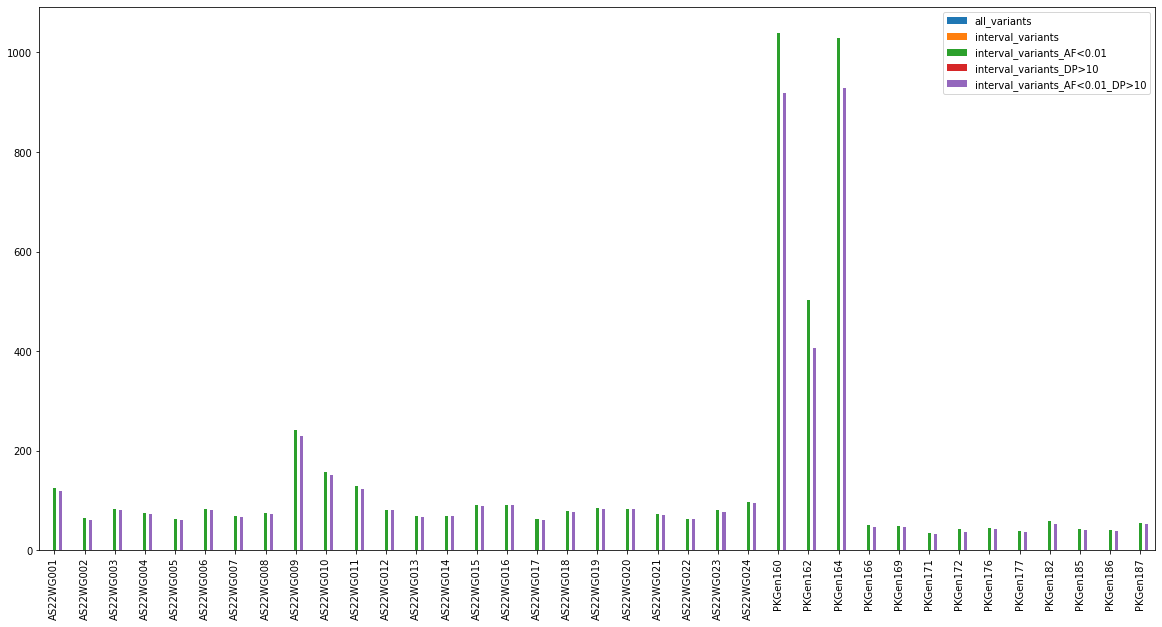

In [39]:
count_df_NEW.to_csv('variant_number_new.csv')
count_df_OLD = pd.read_csv('variant_number_old.csv', index_col=0).astype(int)

count_df_OLD = count_df_OLD.loc[order,:]
diff_df = pd.DataFrame(count_df_OLD.to_numpy() - count_df_NEW.to_numpy(), columns = count_df_OLD.columns, index=count_df_OLD.index)
x = diff_df.plot.bar(figsize=(20, 10))

The plot show the difference between the number of variants between the old AF pipline and new. <br>
colors represents different filters applied on the data. <br>
The plot shows there is no difference in the number of variants in each interval and also no difference in the number of variant when applying DP filter. <br>
This is make sense. 
The difference in the variant number when using AF filter, might be explained by non-passed-filter variants in the old pipeline

In [2]:
new_AF_not_unknown =  GnomAD_df_new_af('data/main_new_AF.prq',
                peak_file='data/hATAC_mATAC_peak.bed.gz',
                remove_unkown=True,
                remove_phased_gt=True,
                only_peak_variants=True)

AF_t = 0.01
DP_t = 10



In [3]:
new_AF_not_unknown.reset_table()
af_v = new_AF_not_unknown.filter_AF(AF_t,remove_unkwon=False ).count_sample_variants(verbos=True).rename('af_and_unknown')
new_AF_not_unknown.reset_table()
af_v_unknown = new_AF_not_unknown.filter_AF(AF_t,remove_unkwon=True ).count_sample_variants(verbos=True).rename('af')

removing variants outside of peak interval
replaced phased genotype (e.g "0|1" -> "0/1")
removed unkwon genotypes (e.g "./.")
Removing variants with allele frequency above 0.01
done
removing variants outside of peak interval
replaced phased genotype (e.g "0|1" -> "0/1")
removed unkwon genotypes (e.g "./.")
Removing variants with allele frequency above 0.01 and variants with no record on gnomAD
done


In [ ]:
diff_df = pd.concat([af_v.rename('all_v'),af_v_unknown.rename('only_af')], axis=1)
diff_df['unknown'] = diff_df.all_v - diff_df.only_af
diff_df['%'] =(diff_df['only_af'] / diff_df['all_v']) * 100
diff_df.to_csv('difference_in_unknown_andknown.csv')

# Compare to Ofer pipeline

In [1]:

import sys
import os
sys.path.append(os.path.abspath("code"))
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# from GnomAD_df_class_NEW_AF import GnomAD_df_new_af
# from GnomAD_df_class import GnomAD_df
AF_t = 0.1
DP_t = 10


In [3]:
gdf =  GnomAD_df_new_af('data/main_new_AF.prq',
                peak_file='data/hATAC_mATAC_peak.bed.gz',
                remove_unkown=True,
                remove_phased_gt=True,
                only_peak_variants=False)

In [18]:
bool_df = gdf.filter_AF(0.01).count_sample_variants()
order = bool_df.index.tolist()
order.sort()
bool_df = bool_df[order]

Removing variants with allele frequency above 0.01 already applied
removed unkwon genotypes (e.g "./.")
replaced phased genotype (e.g "0|1" -> "0/1")
Removing variants with allele frequency above 0.01
done


AS22WG001       2
AS22WG002       2
AS22WG003       2
AS22WG004       2
AS22WG005       6
AS22WG006       6
AS22WG007      10
AS22WG008       7
AS22WG009      71
AS22WG010      39
AS22WG011      38
AS22WG012       7
AS22WG013       7
AS22WG014       5
AS22WG015       5
AS22WG016       2
AS22WG017       2
AS22WG018       1
AS22WG019       2
AS22WG020       4
AS22WG021       3
AS22WG022       3
AS22WG023       3
AS22WG024       7
PKGen160     3619
PKGen162     1461
PKGen164     2058
PKGen166     2063
PKGen169     4016
PKGen171     4045
PKGen172     3990
PKGen176     4984
PKGen177     2121
PKGen182     4170
PKGen185     3931
PKGen186     4110
PKGen187     1933
dtype: int64

In [7]:
raw_df = pd.read_parquet('data/main_new_AF.prq')
raw_df = raw_df[raw_df.INTERVAL_ID.notna()]

In [15]:
# OFER CODE

HETRO = ['0/1', '1/0', '1|0', '0|1']
HOMO_REF = ['0/0', '0|0']
HOMO_ALT = ['1|1', '1/1']
MISSING = ['./.', '.|.']
AFF_IDS = ['01', '04', '05', '09', '12', '16', '19']
IND_AFF = ['23', '24']
UNAFF_IDS = ['06', '13', '20']
PARENTS = ['02', '03', '07', '08', '10', '11', '14', '15', '17', '18', '21', '22']
MOTHERS_DICT = {'01': '03', '04': '08', '05': '08', '06': '08', '09': '11', '12': '15', '13': '15',
                 '16': '18', '19': '22', '20': '22'}
FATHERS_DICT = {'01': '02', '04': '07', '05': '07', '06': '07', '09': '10', '12': '14', '13': '14',
                 '16': '17', '19': '21', '20': '21'}

def calculate_n_vars(df, n_id):
    """
     gets a dataframe and an id from our patients and it prints the number of variant 
     (variant is equal to genotype that is not missing or that is different from homozygote to the reference)
    """
    df = df.loc[(df[f'AS22WG0{n_id}:GT'] != '0|0') &
                          (df[f'AS22WG0{n_id}:GT'] != '0/0') &
                         (df[f'AS22WG0{n_id}:GT'] != './.') &
                         (df[f'AS22WG0{n_id}:GT'] != '.|.')][f'AS22WG0{n_id}:GT']
    
#     print('number of variants for ' + n_id + '=' + str(len([i for i in df.notna().tolist() if i])))
    return len([i for i in df.notna().tolist() if i])


In [19]:
bool_df.index[:24]

Index(['AS22WG001', 'AS22WG002', 'AS22WG003', 'AS22WG004', 'AS22WG005',
       'AS22WG006', 'AS22WG007', 'AS22WG008', 'AS22WG009', 'AS22WG010',
       'AS22WG011', 'AS22WG012', 'AS22WG013', 'AS22WG014', 'AS22WG015',
       'AS22WG016', 'AS22WG017', 'AS22WG018', 'AS22WG019', 'AS22WG020',
       'AS22WG021', 'AS22WG022', 'AS22WG023', 'AS22WG024'],
      dtype='object')

In [25]:
rare_variants_peaks_df = raw_df.loc[raw_df['NEW_AF'] < 0.01]
ofers_list = list(map(lambda x : calculate_n_vars(rare_variants_peaks_df, x),[str(i) if i > 9 else '0' + str(i) for i in range(1,25)] ))
ofers_list = pd.Series(ofers_list, index=bool_df.index[:24], name='Ofer_pipeline')
result = pd.concat([bool_df.rename('ido_pipeline'),ofers_list], axis=1).iloc[:24,:].astype(int)
result

,ido_pipeline,Ofer_pipeline
AS22WG001,2,2
AS22WG002,2,2
AS22WG003,2,2
AS22WG004,2,2
AS22WG005,6,6
AS22WG006,6,6
AS22WG007,10,10
AS22WG008,7,7
AS22WG009,71,71
AS22WG010,39,39
